# Analysis of dataset about mall customers

## Contents

1. [Dataset](#Dataset)

$\overline{\ \ \ \ \ \ }$1.1. [Overview](#Overview)

$\overline{\ \ \ \ \ \ }$1.2. [Descriptive Statistics](#Descriptive-Statistics)

$\overline{\ \ \ \ \ \ }$1.3. [Analysis Purpose](#Analysis-Purpose)

2. [Feature Analysis](#Feature-Analysis)

$\overline{\ \ \ \ \ \ }$2.1. [Univariate Feature Analysis](#Univariate-Feature-Analysis)

$\overline{\ \ \ \ \ \ }$2.2. [Bivariate Feature Analysis](#Bivariate-Feature-Analysis)

$\overline{\ \ \ \ \ \ }$$\overline{\ \ \ \ \ \ }$2.2.1. [Linear Dependence](#Linear-Dependence)

$\overline{\ \ \ \ \ \ }$$\overline{\ \ \ \ \ \ }$2.2.2. [Non-linear Dependence](#Non-linear-Dependence)

$\overline{\ \ \ \ \ \ }$$\overline{\ \ \ \ \ \ }$2.2.3. [Bivariate Graphs and Distributions](#Bivariate-Graphs-and-Distributions)

3. [Clustering](#Clustering)

$\overline{\ \ \ \ \ \ }$3.1. [Number of Groups](#Number-of-Groups)

$\overline{\ \ \ \ \ \ }$3.2. [Results](#Results)

## Dataset
    
The dataset is about customers visiting some mall. The mall owner assigned scores to each of them as well as gathered statistical data. It is created for learning purposes to improve data analysis skills in the field of customer segmentation. The dataset is [presented on Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python), platform with many structured datasets for analysis and statistics.
    
    
**License**
    
No specified license, author  allows to use the dataset in any way (details in the link above).

### Overview
    
`mall customers` dataset represents the mall owner who collected data using the ID cards of customers. The owner possesses some basic data about clients and wants to group them. Thus, the purpose of the project is to conduct statistical analysis and figure out **patterns in data**, whether one can spot linear dependencies, provide homogeneous grouping, or observe non-linear relationships.
    
The problem of **customers segmentation** is crucial in every marketing company because target groups (i.e. clients of certain characteristics with high potentiality of big purchases) can be used to adjust advertisement and other startegies to better attract and focus on them, thus, increasing the income and making most profit while taking less effort to "fit" under low-paying and non-stable clients.

### Descriptive statistics

The dataset contains 5 features and 200 observations and is **secondary data** (since it was collected firstly by owner and then distributed into public usage) which is a **sample** drawn from the whole population of mall customers (it is based on customers who use ID cards and have provided the information about annual salary, not every client falls into that category). The level of data is **individual** since no aggregation is applied. Type: **cross-sectional**, no time frame specified, data is not aligned with *time* axis. Thus, the **unit of observation** is *client*.

The table:

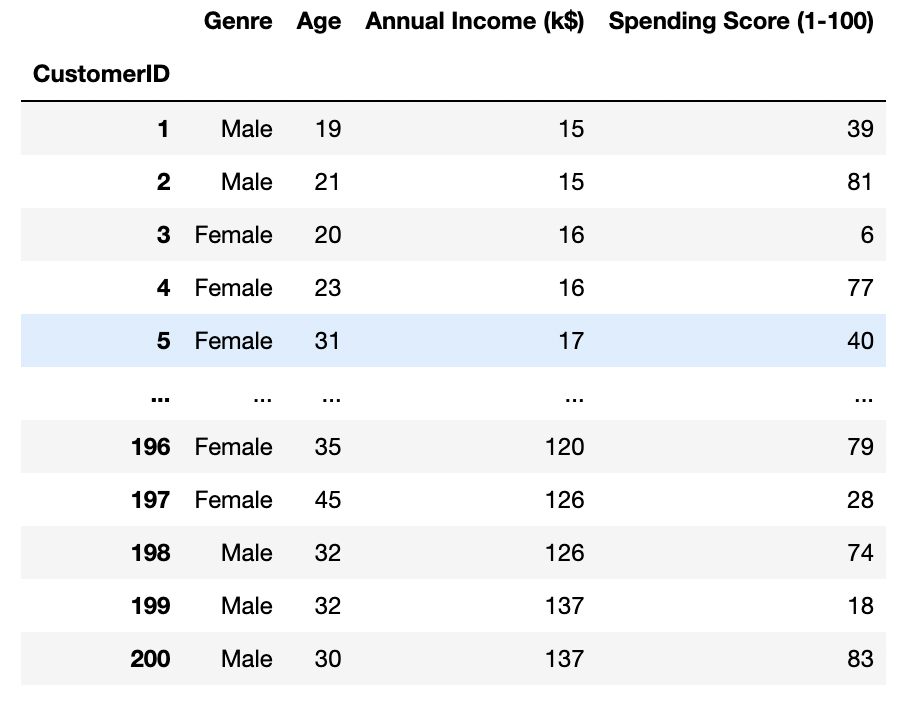

In [1]:
from IPython.display import Image, display
display(Image(filename='png/dataset.png', width=500, embed=True))

1) `CustomerID` represents the relative ID number of customer, has only unique values (200) since it serves as a database key.

2) `Genre` is binary variable which provides information whether the customer is male of female (categorical variable).

3) `Age` is numeric variable, measured in years.

4) `Annual Income (k$)` is rounded annual income of clients, measured in thousands of dollars per year (numeric variable).

5) `Spending Score (1-100)` is the score assigned by mall owner. The higher the value, the "better" is client's purchase history (numeric variable).

**Calculations note**: since the number of samples is not small (200), division by $n = N = 200$ (treating dataset as population) is not very different from $n = N + 1 = 201$ (treating dataset as sample of population). All calculations use $n = N = 200$.

The summary statistics for features (one categorical and 3 numeric):

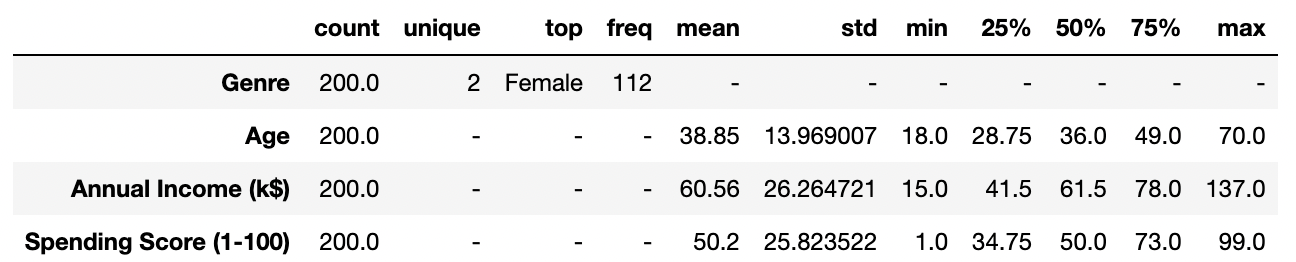

In [2]:
display(Image(filename='png/summary-statistics.png', width=700, embed=True))

From the first view, age has smaller *variance* $\displaystyle \left(\text{Var} = \frac{1}{N}\sum_{i=1}^{N}(x_i - \overline{x})^2\right)$ and *standard deviation* $\displaystyle \left(\sigma = \sqrt{Var}\right)$ and therefore more centered distribution. Spending score has fairly uniform distribution based on its quartiles. Overall, summary does not provide useful information about patterns, thus, features will be looked at more thoroughly.

### Analysis Purpose
   
The question to answer is "What relationships purchasing activity (`Spending Score` variable) has with age, genre, and annual income (independent variables, inner customers characteristics)?". Answer would indicate the degree of confidence to which one can **predict** the *score* variable.

## Feature Analysis

### Univariate Feature Analysis  <a id='2.1'><a/>

**`CustomerID`** represents the relative ID number of customer, has only unique values (200) since it serves as a database key.

It does not give any information and is used as index only.

**`Genre`** is binary variable which provides data whether the customer is male of female (categorical variable).

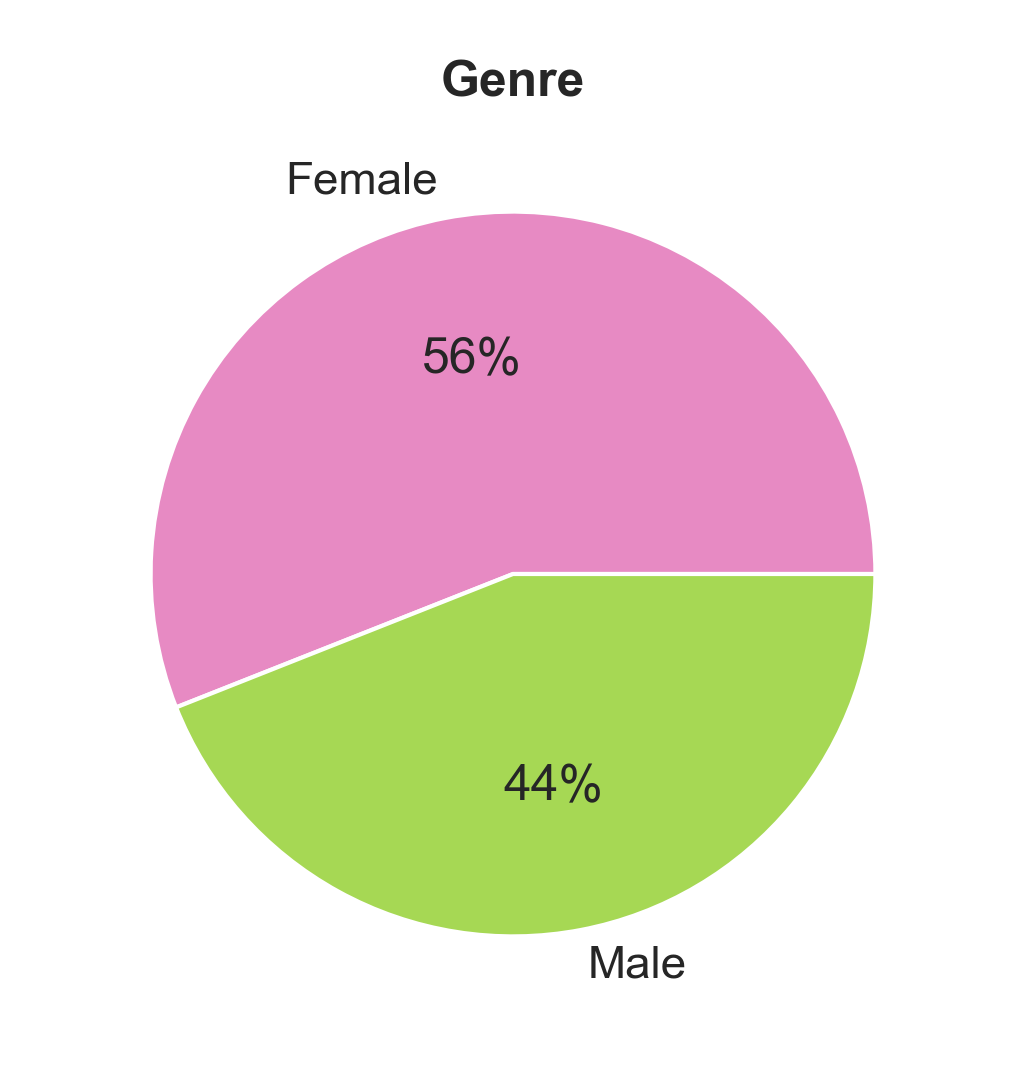

In [3]:
display(Image(filename='visualizations/genre-chart1.png', width=300, embed=True))

The genre distribution is almost balanced, having 12% (24) difference between female (112) and male (88) customers.

**`Age`** is numeric variable, measured in years.

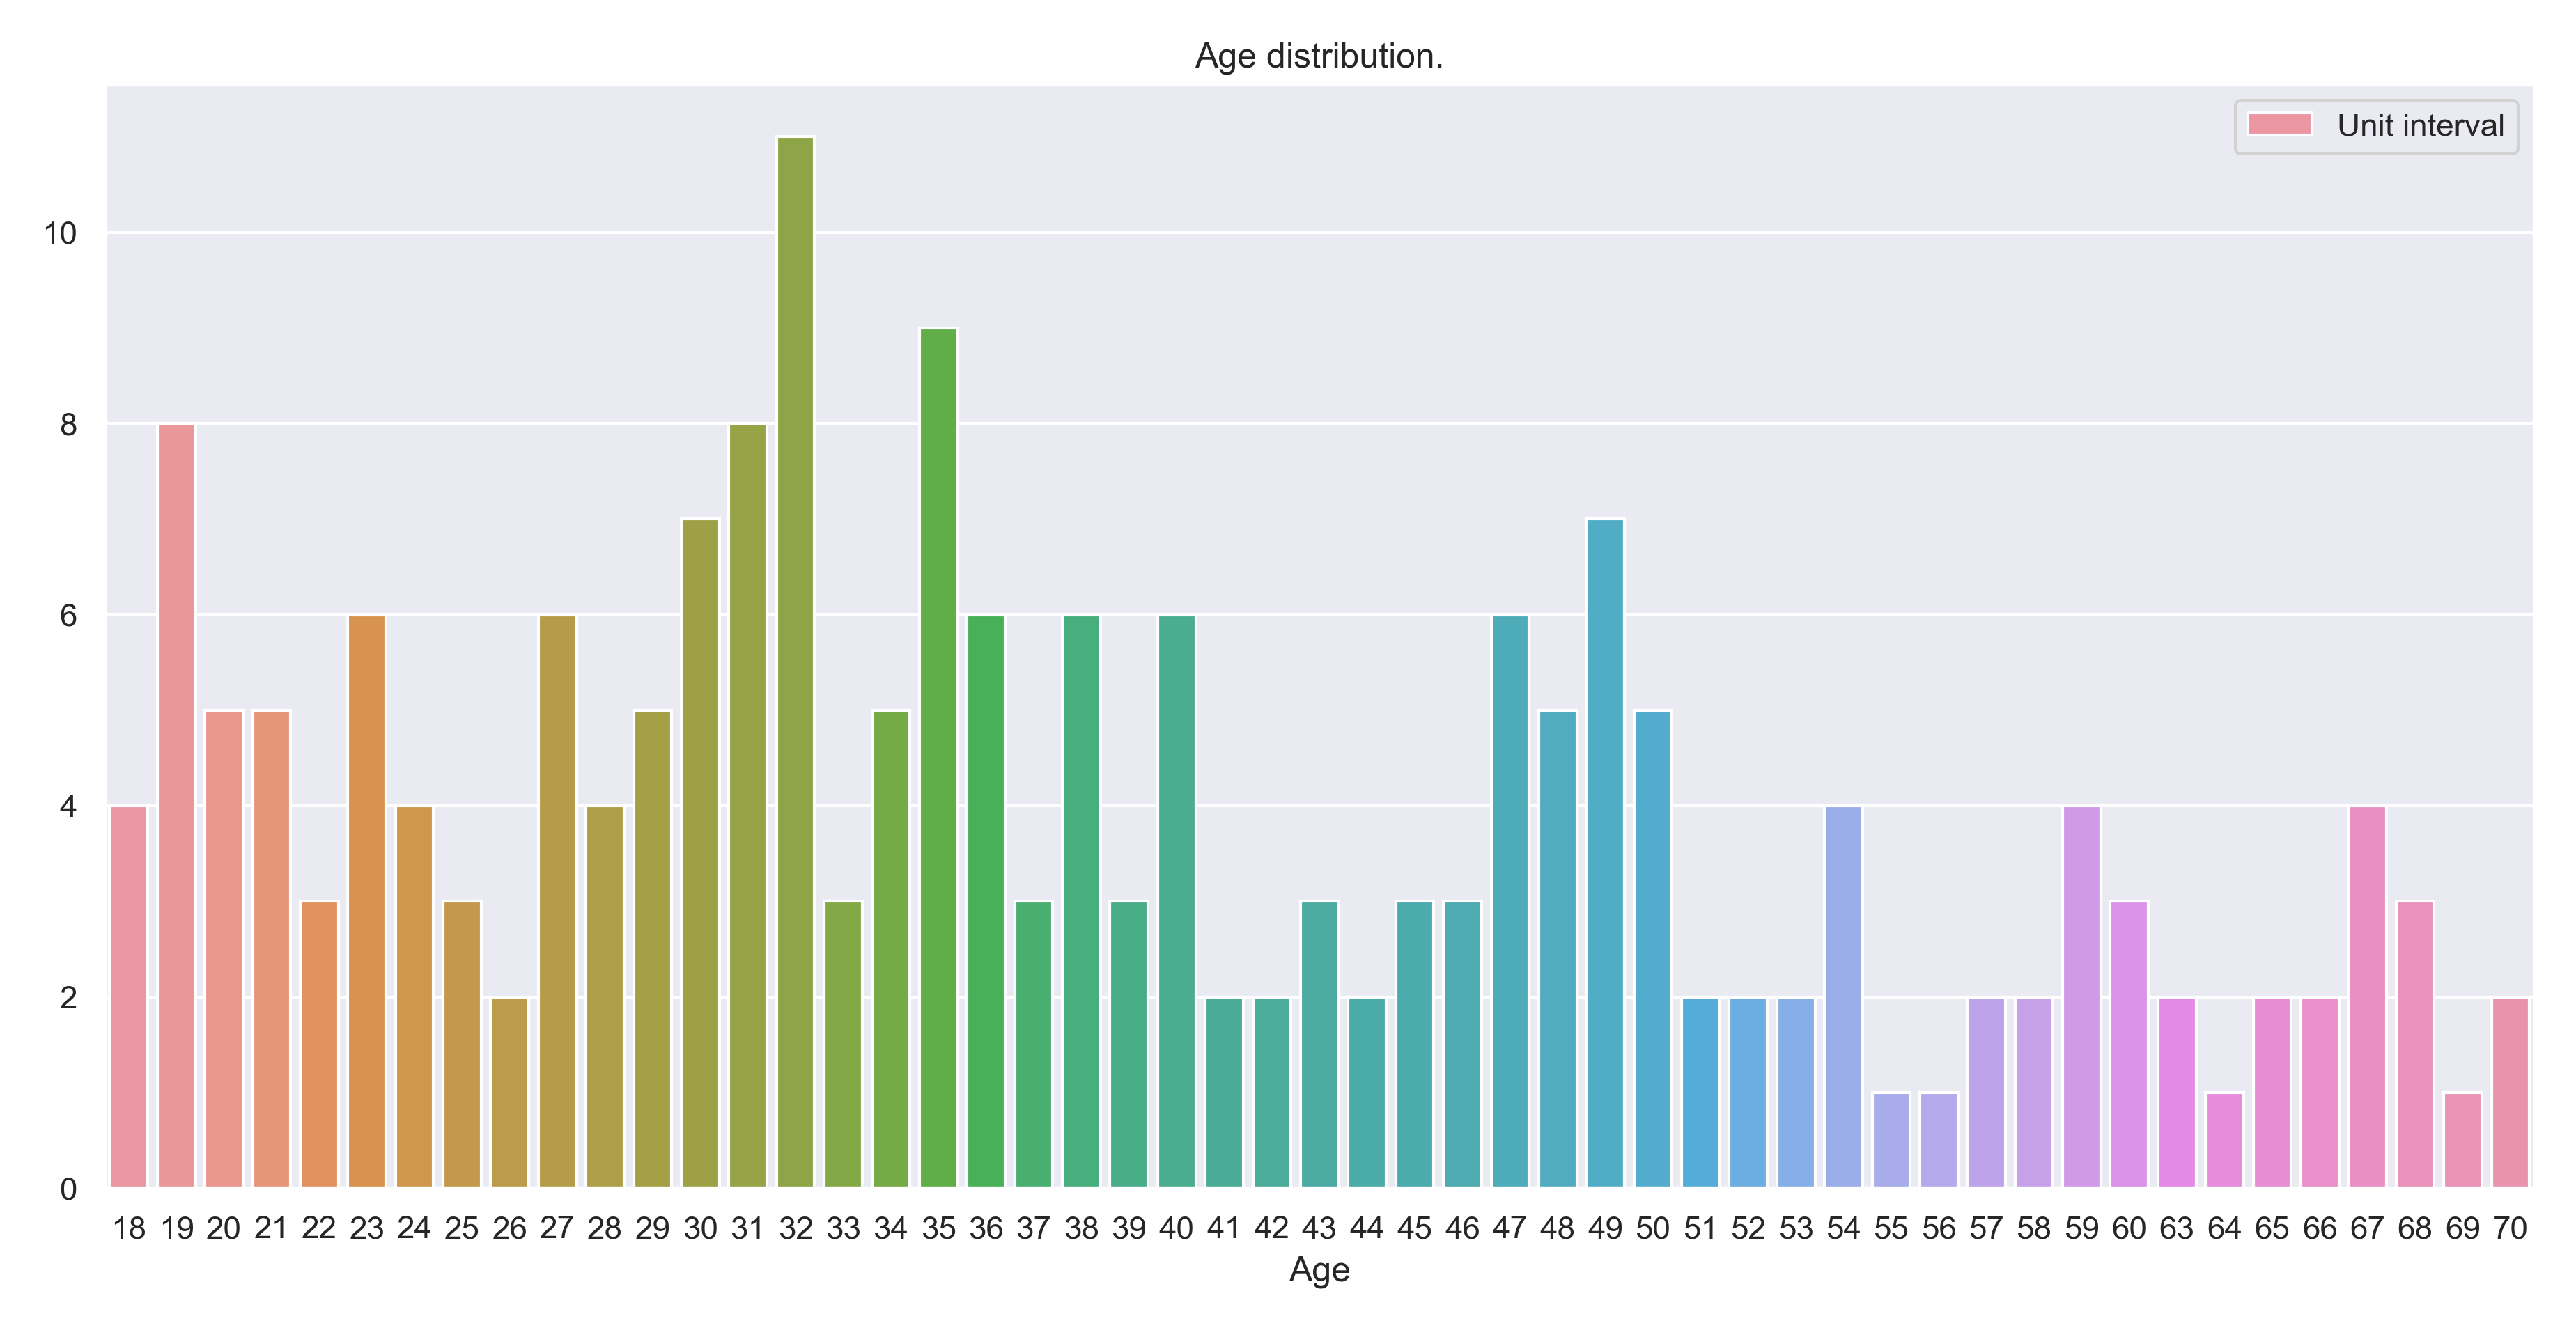

In [4]:
display(Image(filename='visualizations/age-unit-interval-chart.png', width=900, embed=True))

Even though the distribution is presented, groups number is too big because of small interval size (1 year). To see clearer grouping, the bin width should be increased.

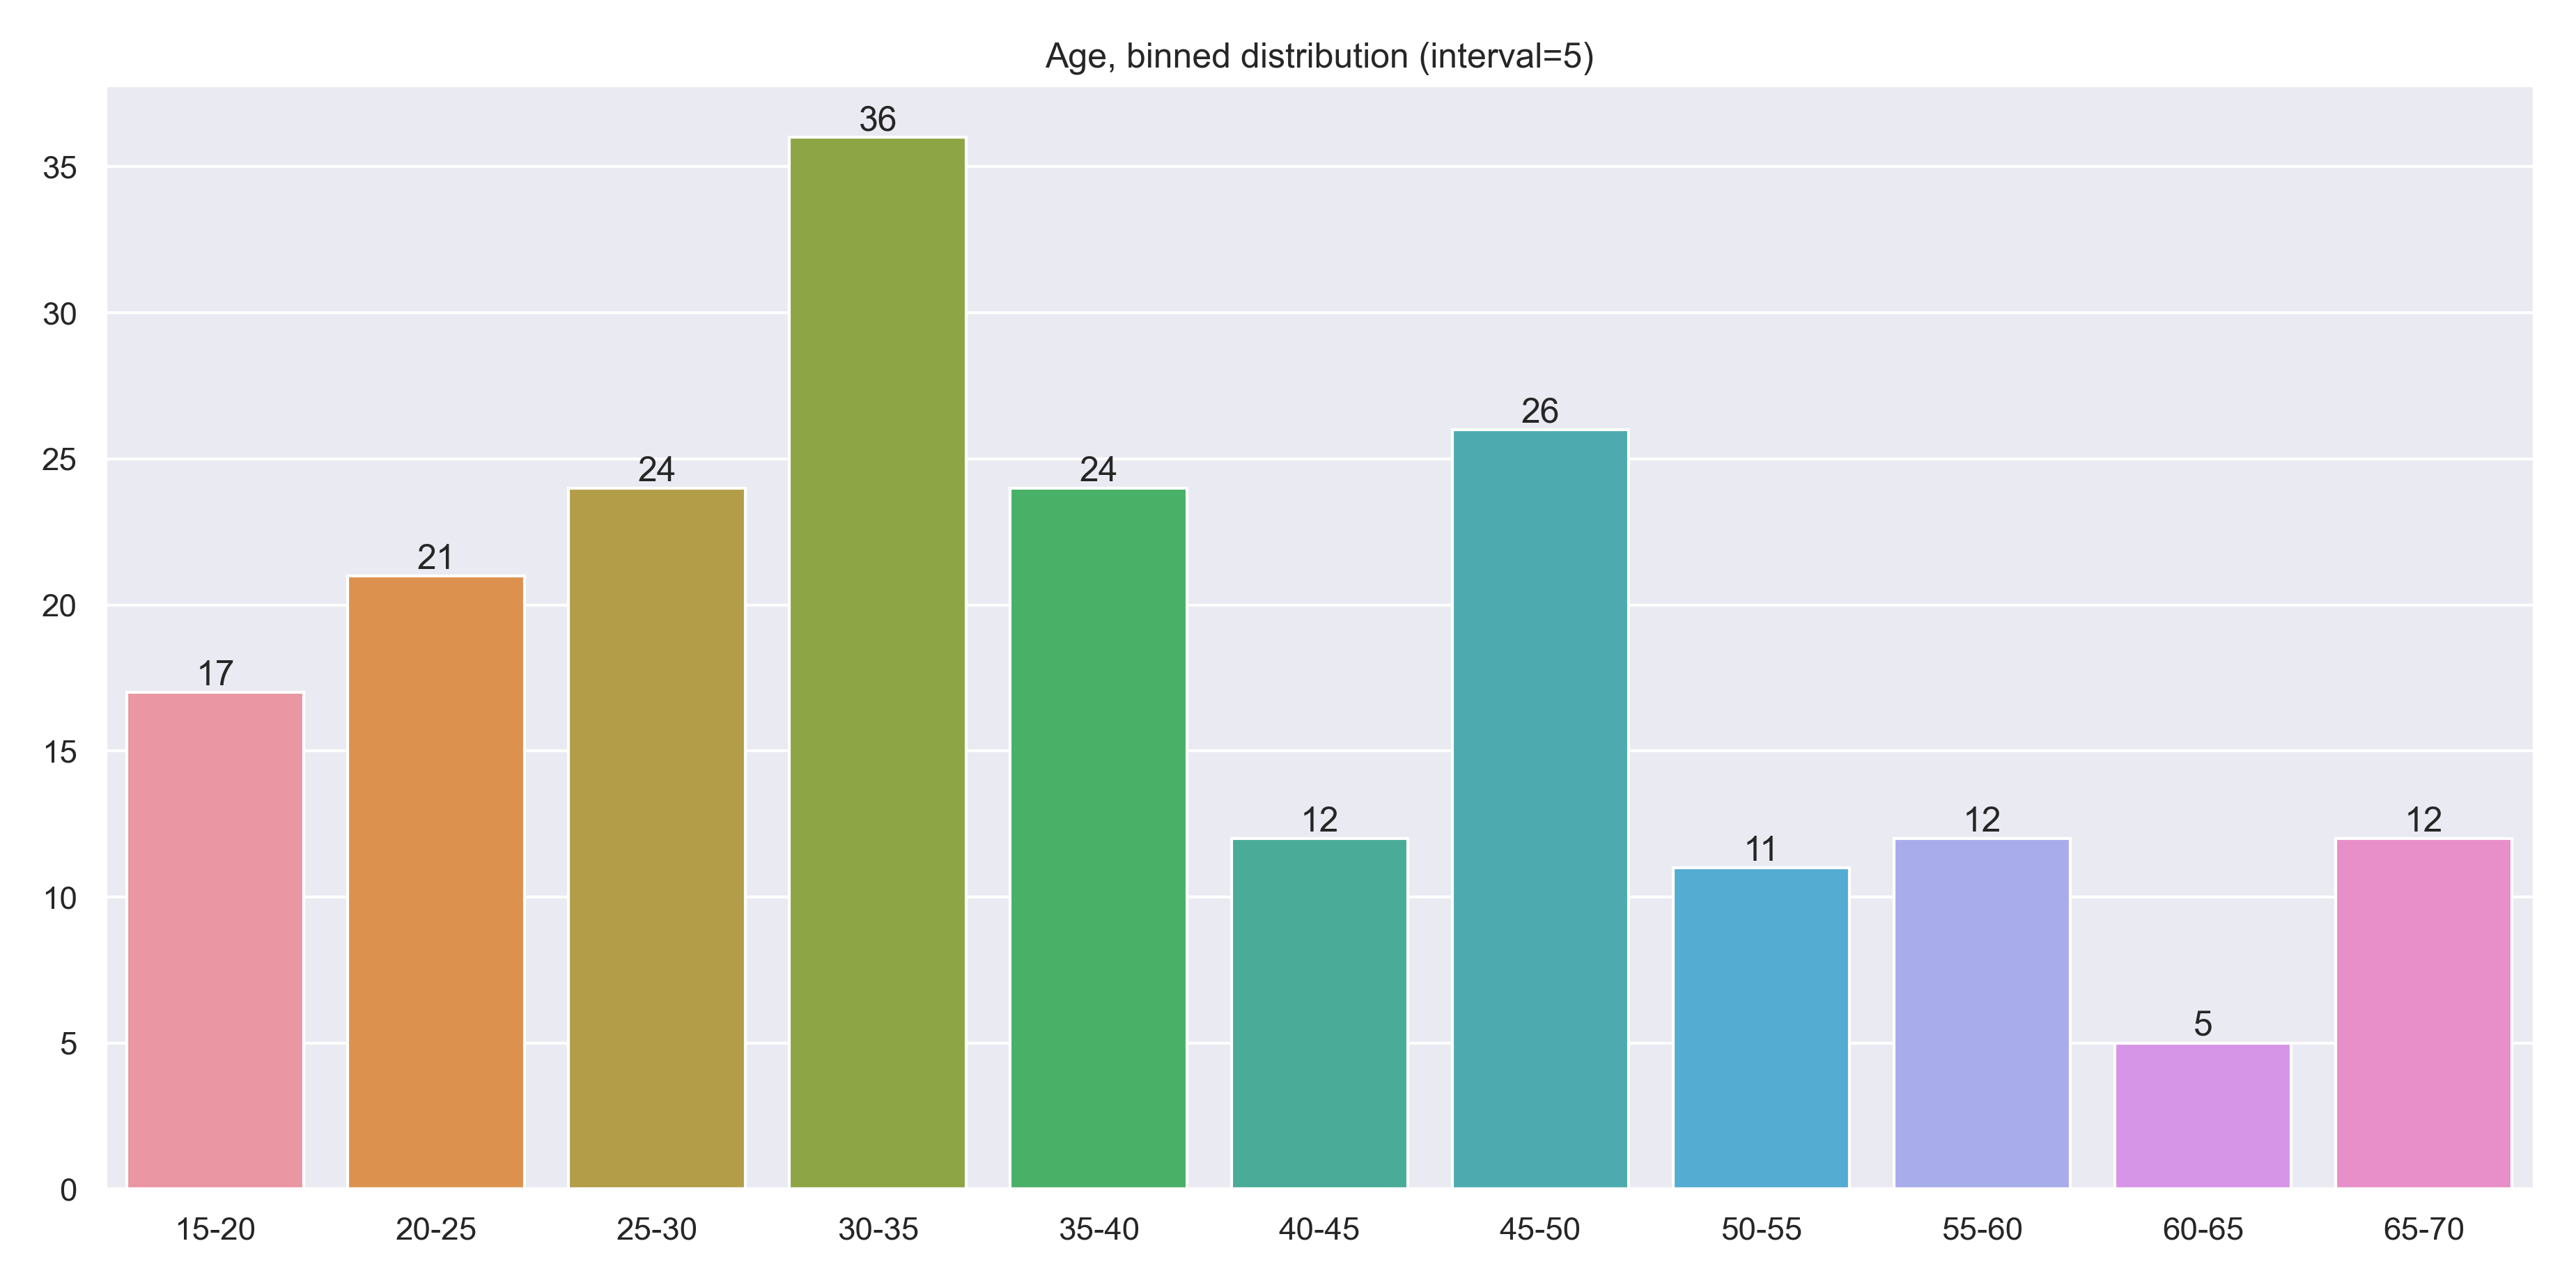

In [5]:
display(Image(filename='visualizations/age-binned-dist-chart.png', width=800, embed=True))

The chart above shows that people at age of 30-35 are mostly presented in the dataset (mode), whereas people of age 60-65 form the smallest sample.

Mean is calculated as $\displaystyle \frac{\sum_{i=1}^{N}x_i}{N} = 38.85$. Median is the midpoint of the interval and therefore average of 100th and 101st elements and equal to 36. These values indicate that the distribution is **right-skewed**. 

**`Annual Income (k$)`** is rounded annual income of clients, measured in thousands of dollars per year (numeric variable).

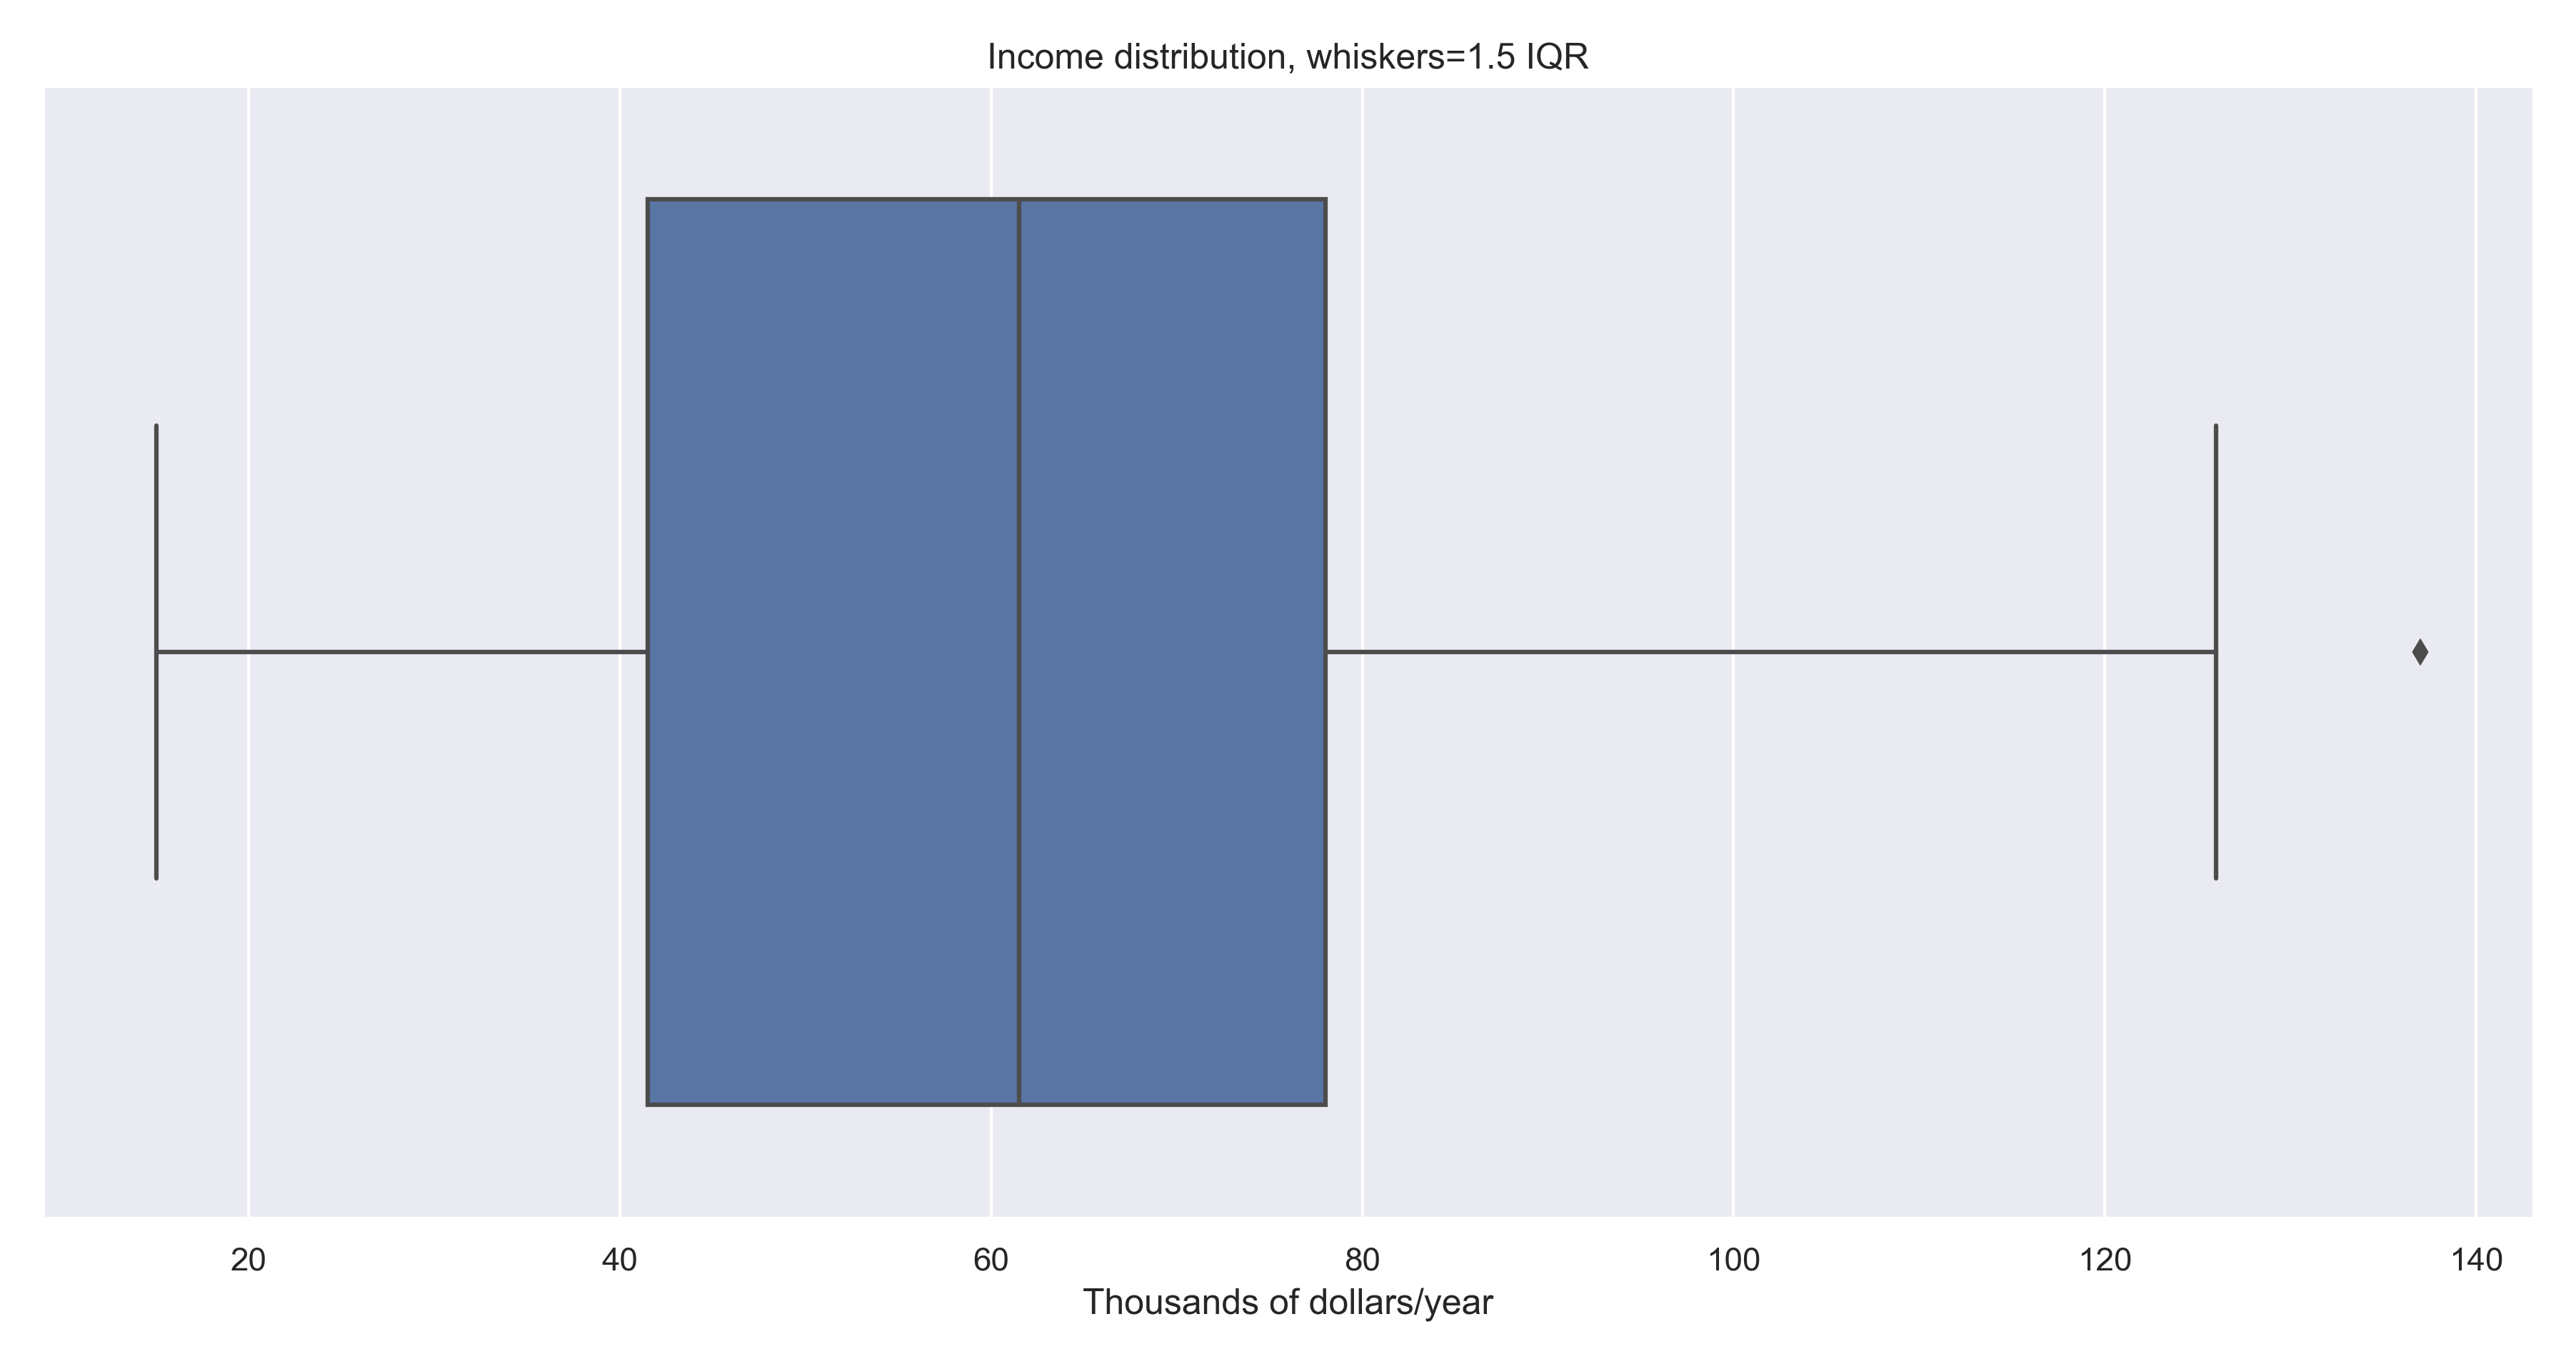

In [6]:
display(Image(filename='visualizations/income-chart.png', width=800, embed=True))

Distribution shows that mean value (Q2) is close to 60 (almost between Q1 and Q3) and right "tail" of distribution is longer than left one, indicating that distribution is slightly **right-skewed**.

### Bivariate Feature Analysis

The central feature is **Spending Score**, the behavior of which is explored. It can have two types of relationships with independent variables - linear and non-linear.

#### Linear Dependence

Assuming only linear dependence is a restriction of input function to the family of linear functions. Typically, **regression** helps to construct the line of best fit to data points.

#### Non-linear Dependence

Non-linear type of relationship is any kind of correlation apart from linear one. For instance, if joint distributions of dependent and independent variables represent two non-overlapping distributions, the independent variable is said to completely separate dependent variable into homogeneous subsamples. Since the `Spending Score` is numeric, either *clustering* or *regression* are applicable.

**Clustering** is the approach to find similarities among observations and therefore group them according to some criteria. *KMeans* is an approach to look for "neighbors". Speaking more formally, $k$ centers (different $k$ colors) are picked in $N$-dimensional space and iteratively updated while all the points being assigned to the group (color) of closest center. The process is done by computing euclidean distances $\displaystyle \left(d(q,p) = \sqrt{\sum_{i=1}^{N}(q_i - p_i)^2},\text{ q and p being points on N-dimensional axis}\right)$. In other words, if people with similar characteristics are scattered on $N$-dimensional axis, similarity is correlated with homogeneity ("neighborhood") of resulted subsamples. Clients staying "close to each other" on the axis are groups called *clusters*.
    
There are many examples of clustering importance apart from customers segmentation. Division of students into "stronger" and "weaker" classes allows to adjust coursework pace, homework load, and increase overall efficiency of students from both groups. Finding reasons behind "churn" customers (ones who cancel the product or service within a given period of time) makes company able to call and make special offers to clients with high potentiality of "churn" instead of calling random ones.

#### Bivariate Graphs and Distributions

Using the boxplot, distribution of `Spending Score` splitted by `Genre` could be observed.

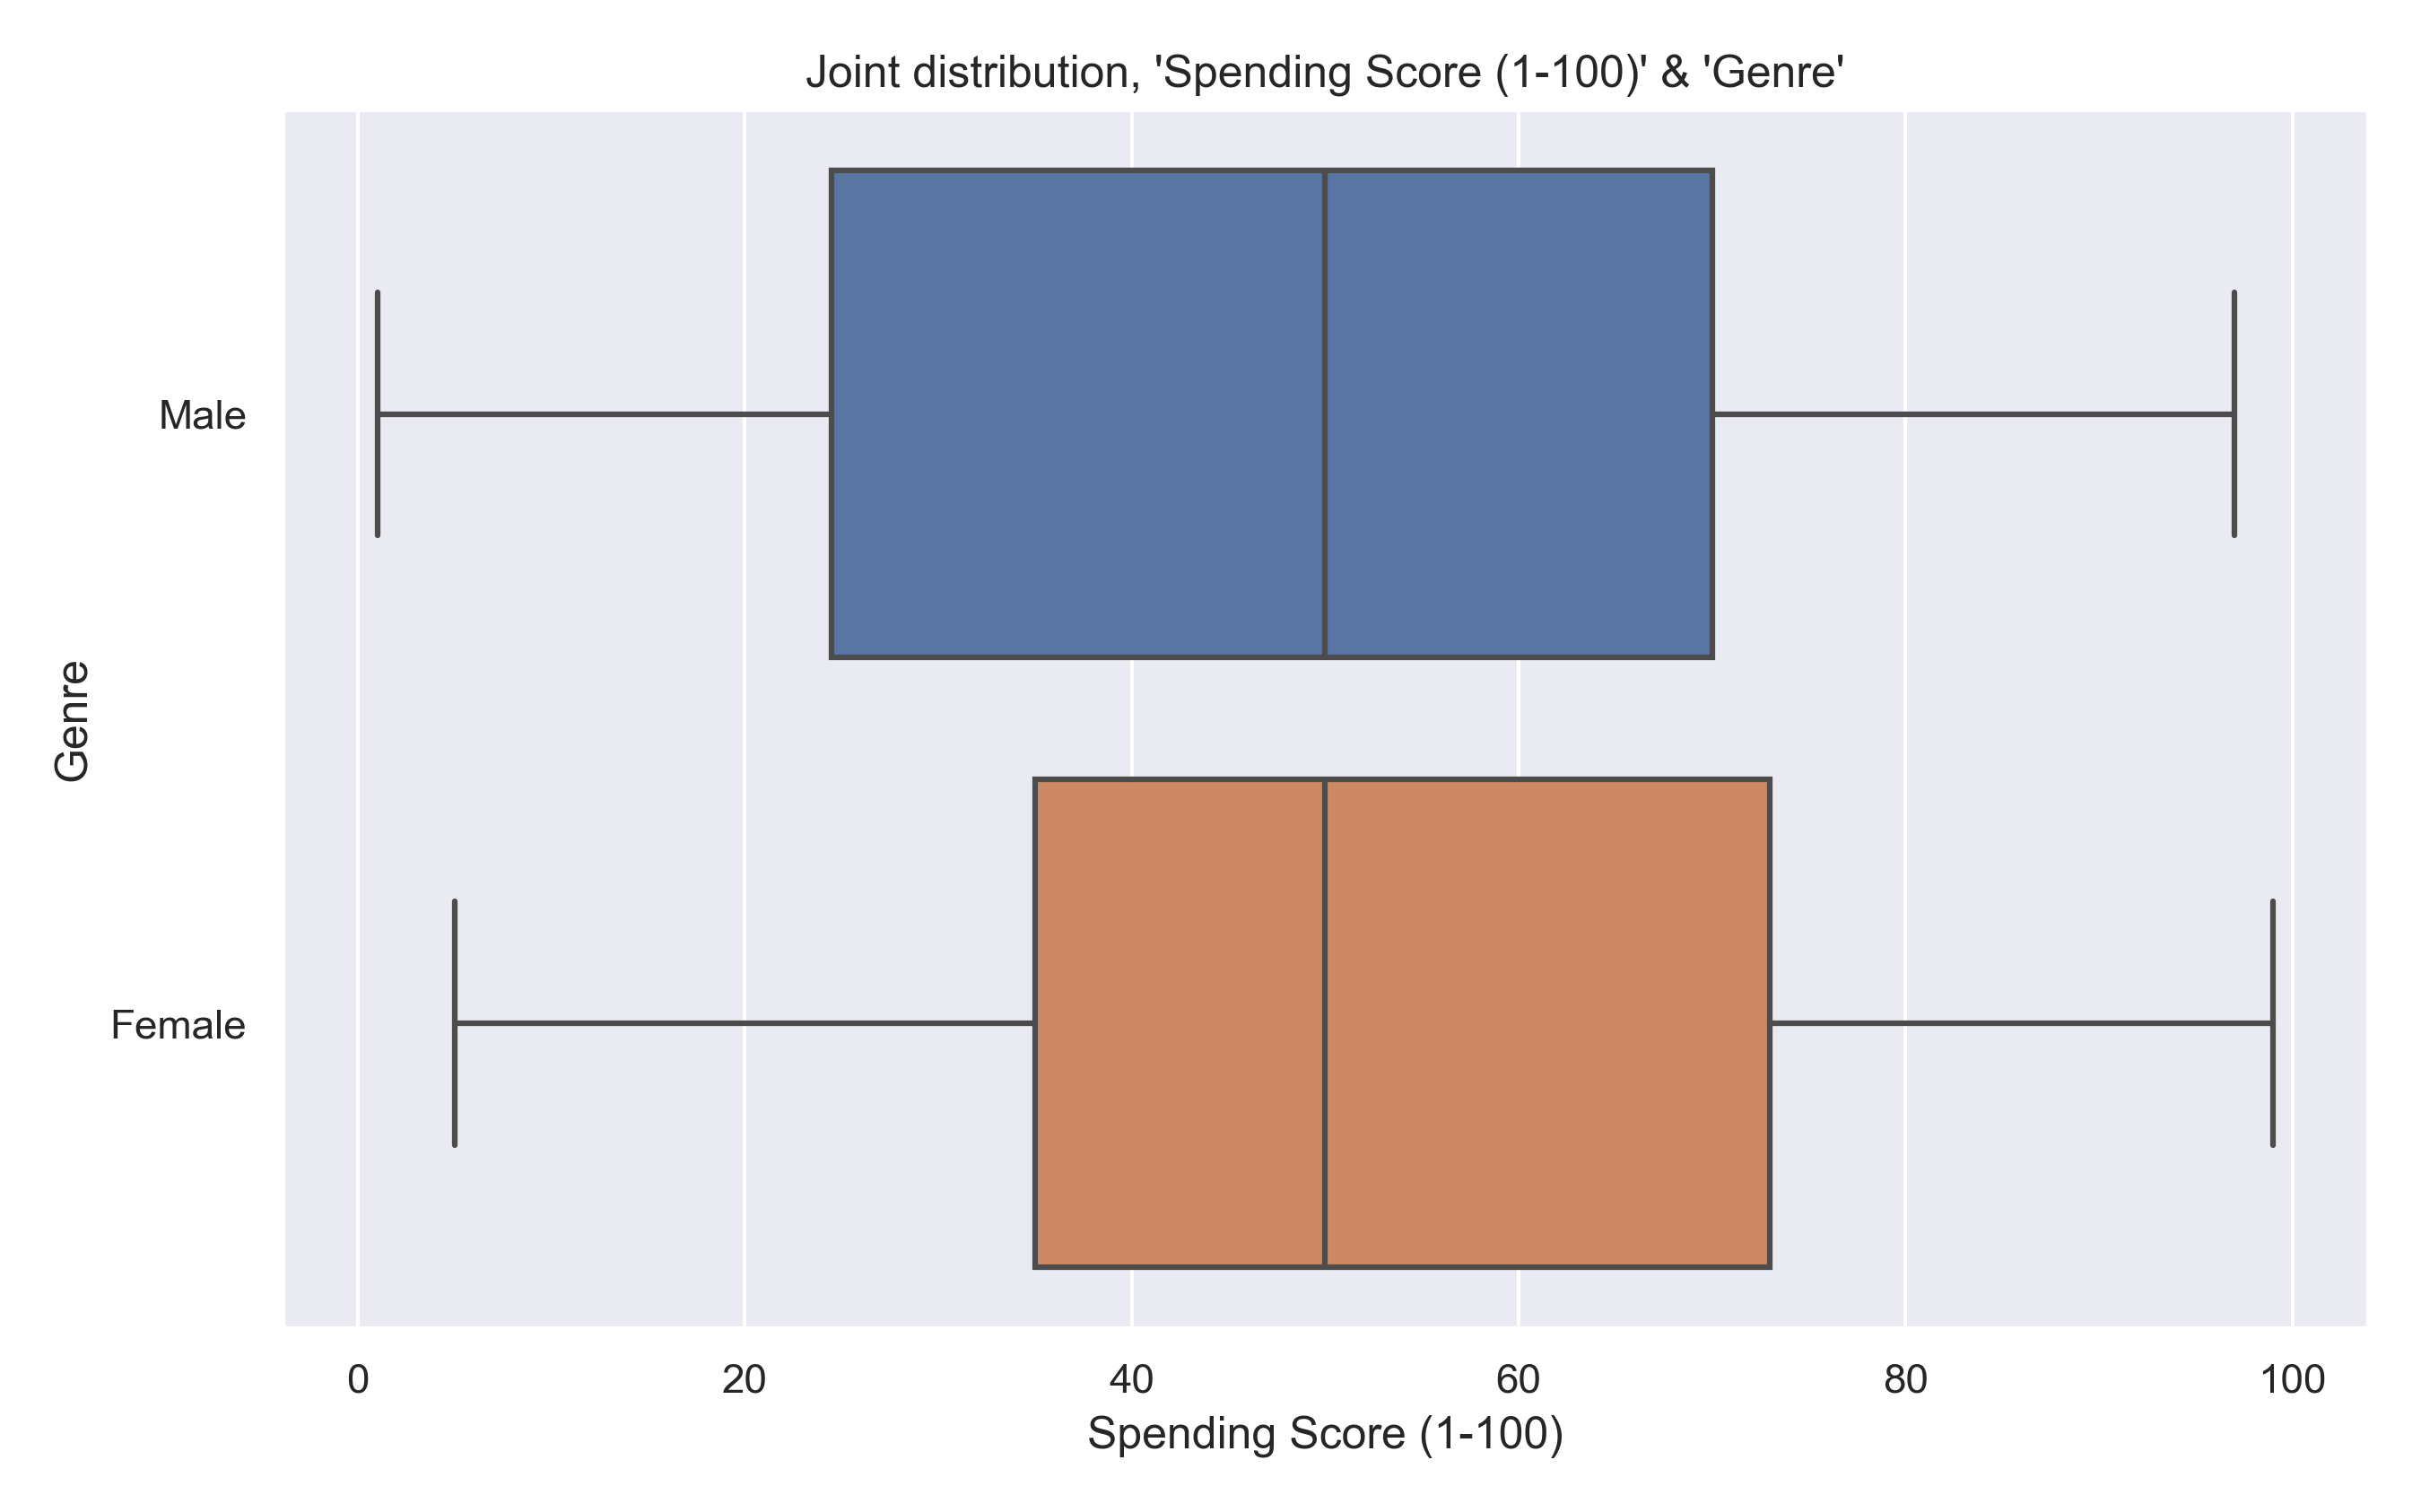

In [7]:
display(Image(filename='visualizations/joint-score-genre.png', width=700, embed=True))

`Genre` produces *right-skewed* (female) and *left-skewed* (male) distributions, but they still have the same mean, which indicates a high level of homogeneity alongside with close Q3 and Q2 values.

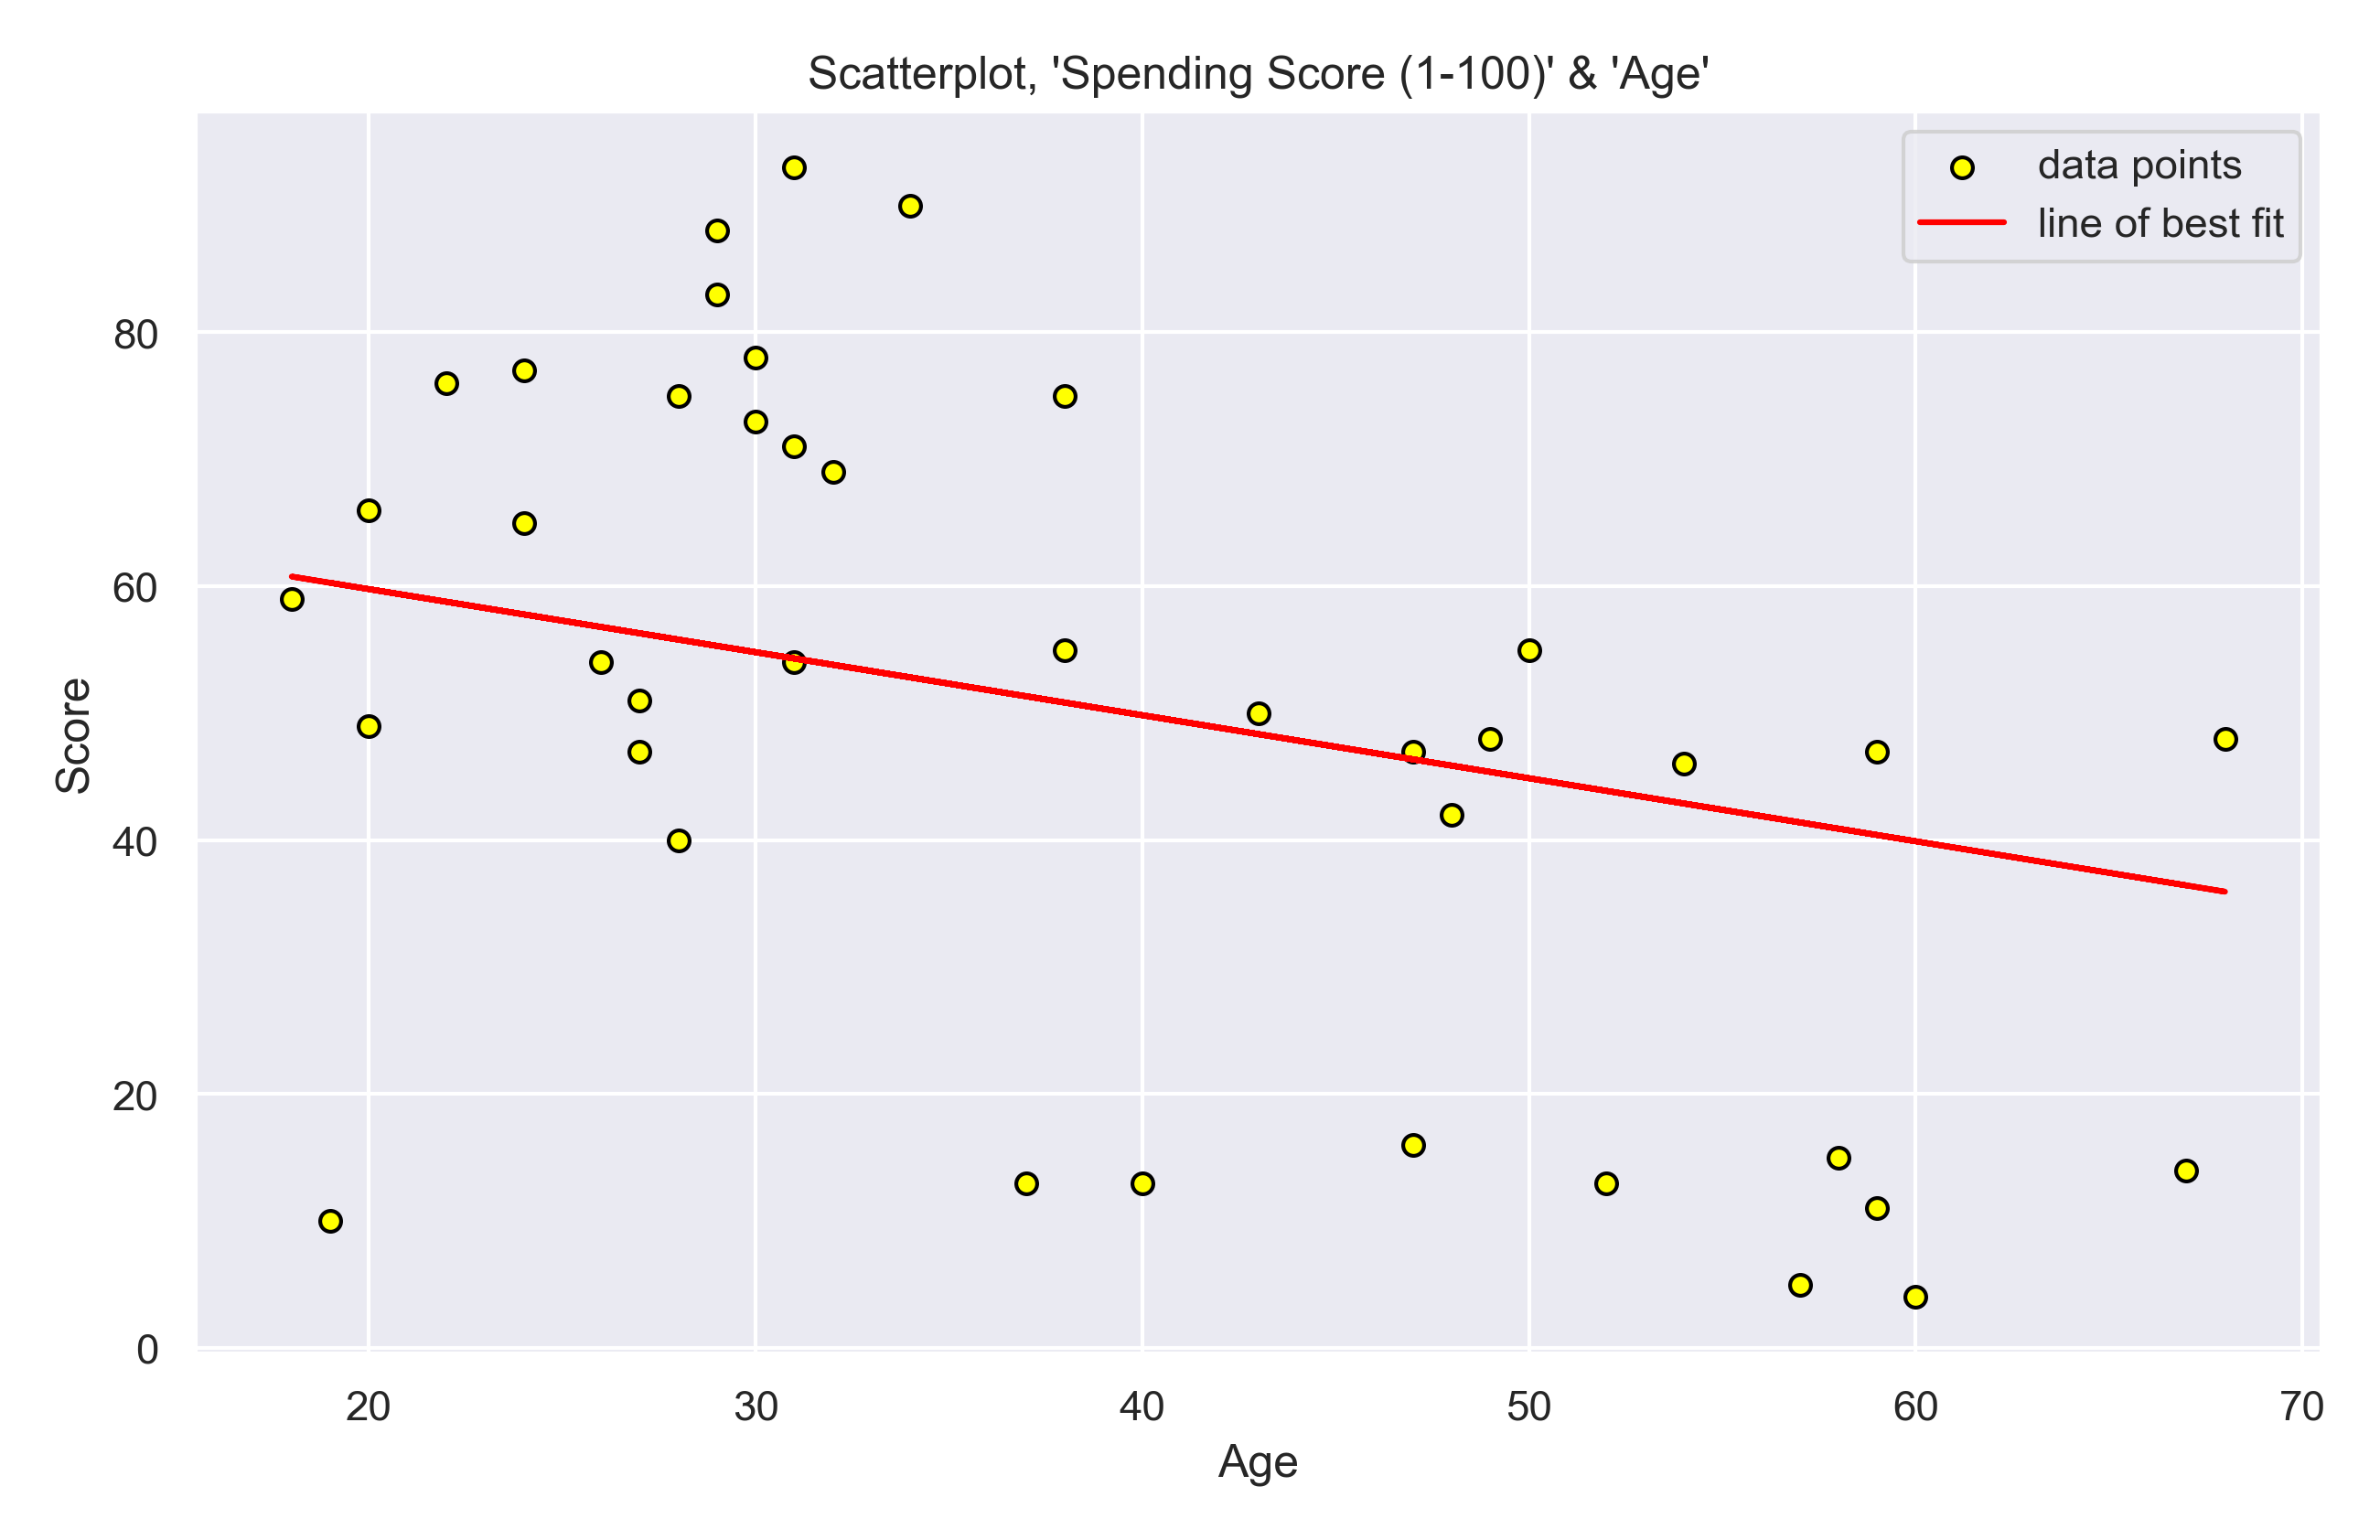

In [8]:
display(Image(filename='visualizations/scatter-score-age.png', width=700, embed=True))

The graph above indicates the absence of linear relationship between `Spending Score` and `Age` variables of first order. Points are very far away from line, meaning that error of that estimation is large.

Using two plots at the same time, it is possible to reflect all four features present in dataset:

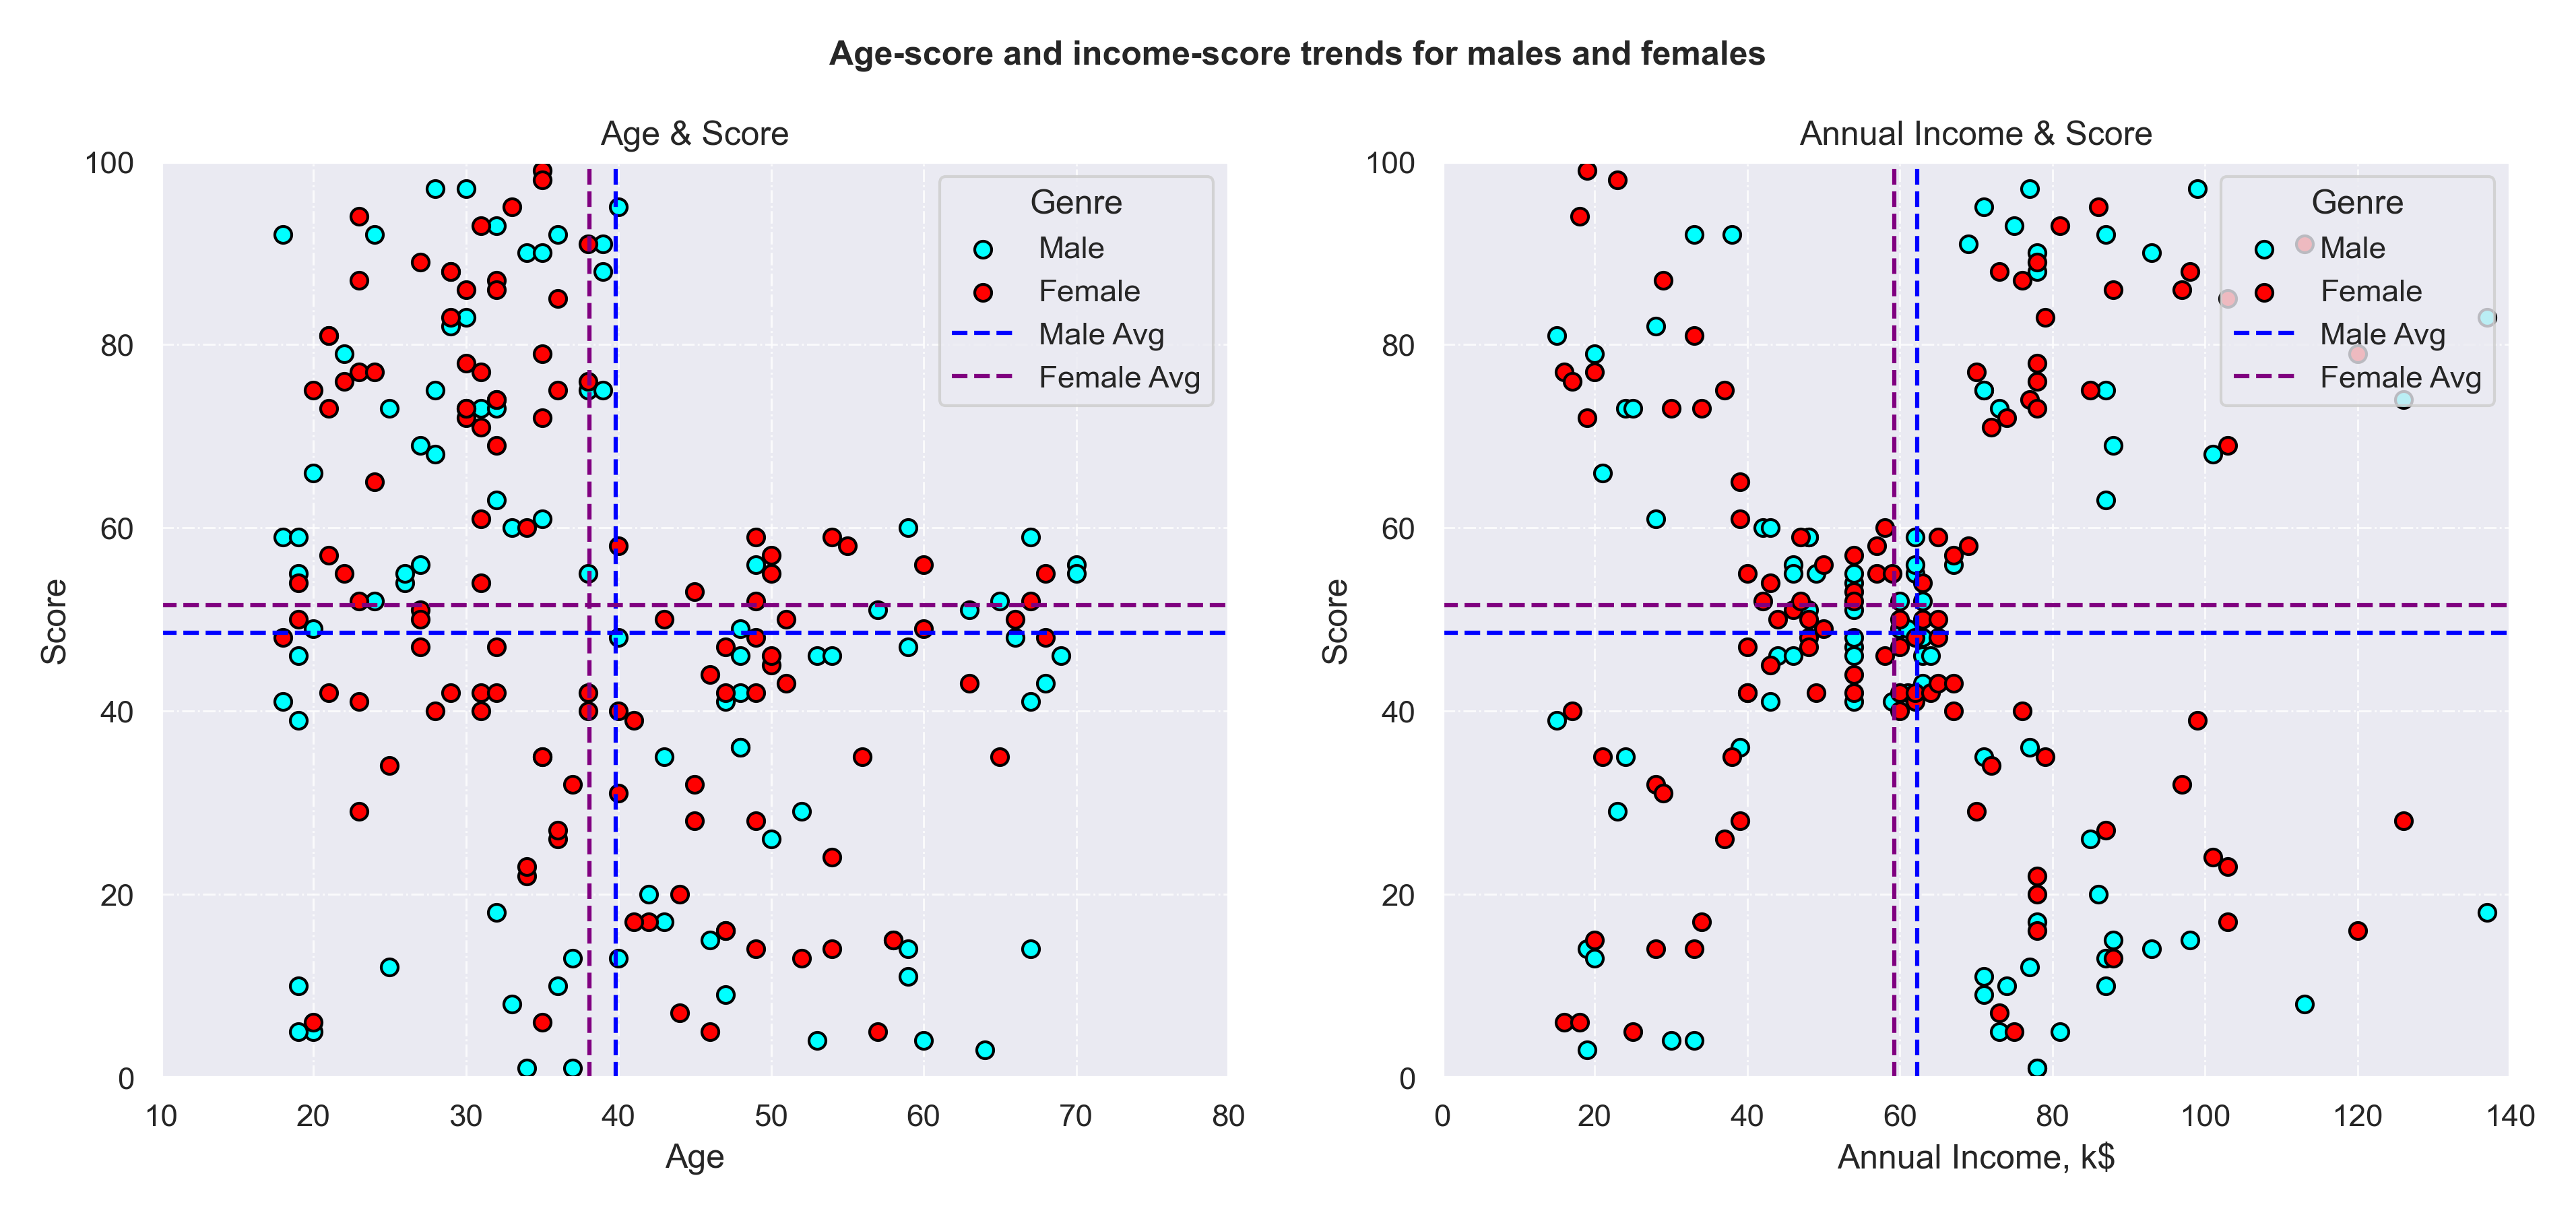

In [9]:
display(Image(filename='visualizations/score-age-income.png', width=900, embed=True))

The left graph is the same illustration as the previous one (`Score` & `Age`) but with labeled `Genre` variable and computed means for males and females to corresponding plots. Males and females are randomly distributed (i.e. without patterns) and provide no insight. The only thing is that space on axis {`Score` $\displaystyle\in [60, 100]$}$\bigcup${`Age` $\displaystyle\in [45, 70]$} (upper-right corner) is completely empty (no data points fall within this range). However, this detail does not help with the rest of axis.

The right one (`Annual Income` & `Score`) is clearer in terms of information. Even though separation of points on male and female does not decrease the entropy, it is noticeable that groups (swarms of points) are formed. Thus, clustering would help with optimal number of groups and vivid illustration.

## Clustering <a id='3'><a/>

### Number of Groups  <a id='3.1'></a>

Optimal number of groups is important since having too many of them will lead to similar subsamples while having too few clusters will result into higher level of heterogeneity. *Elbow curve* helps to solve this problem.

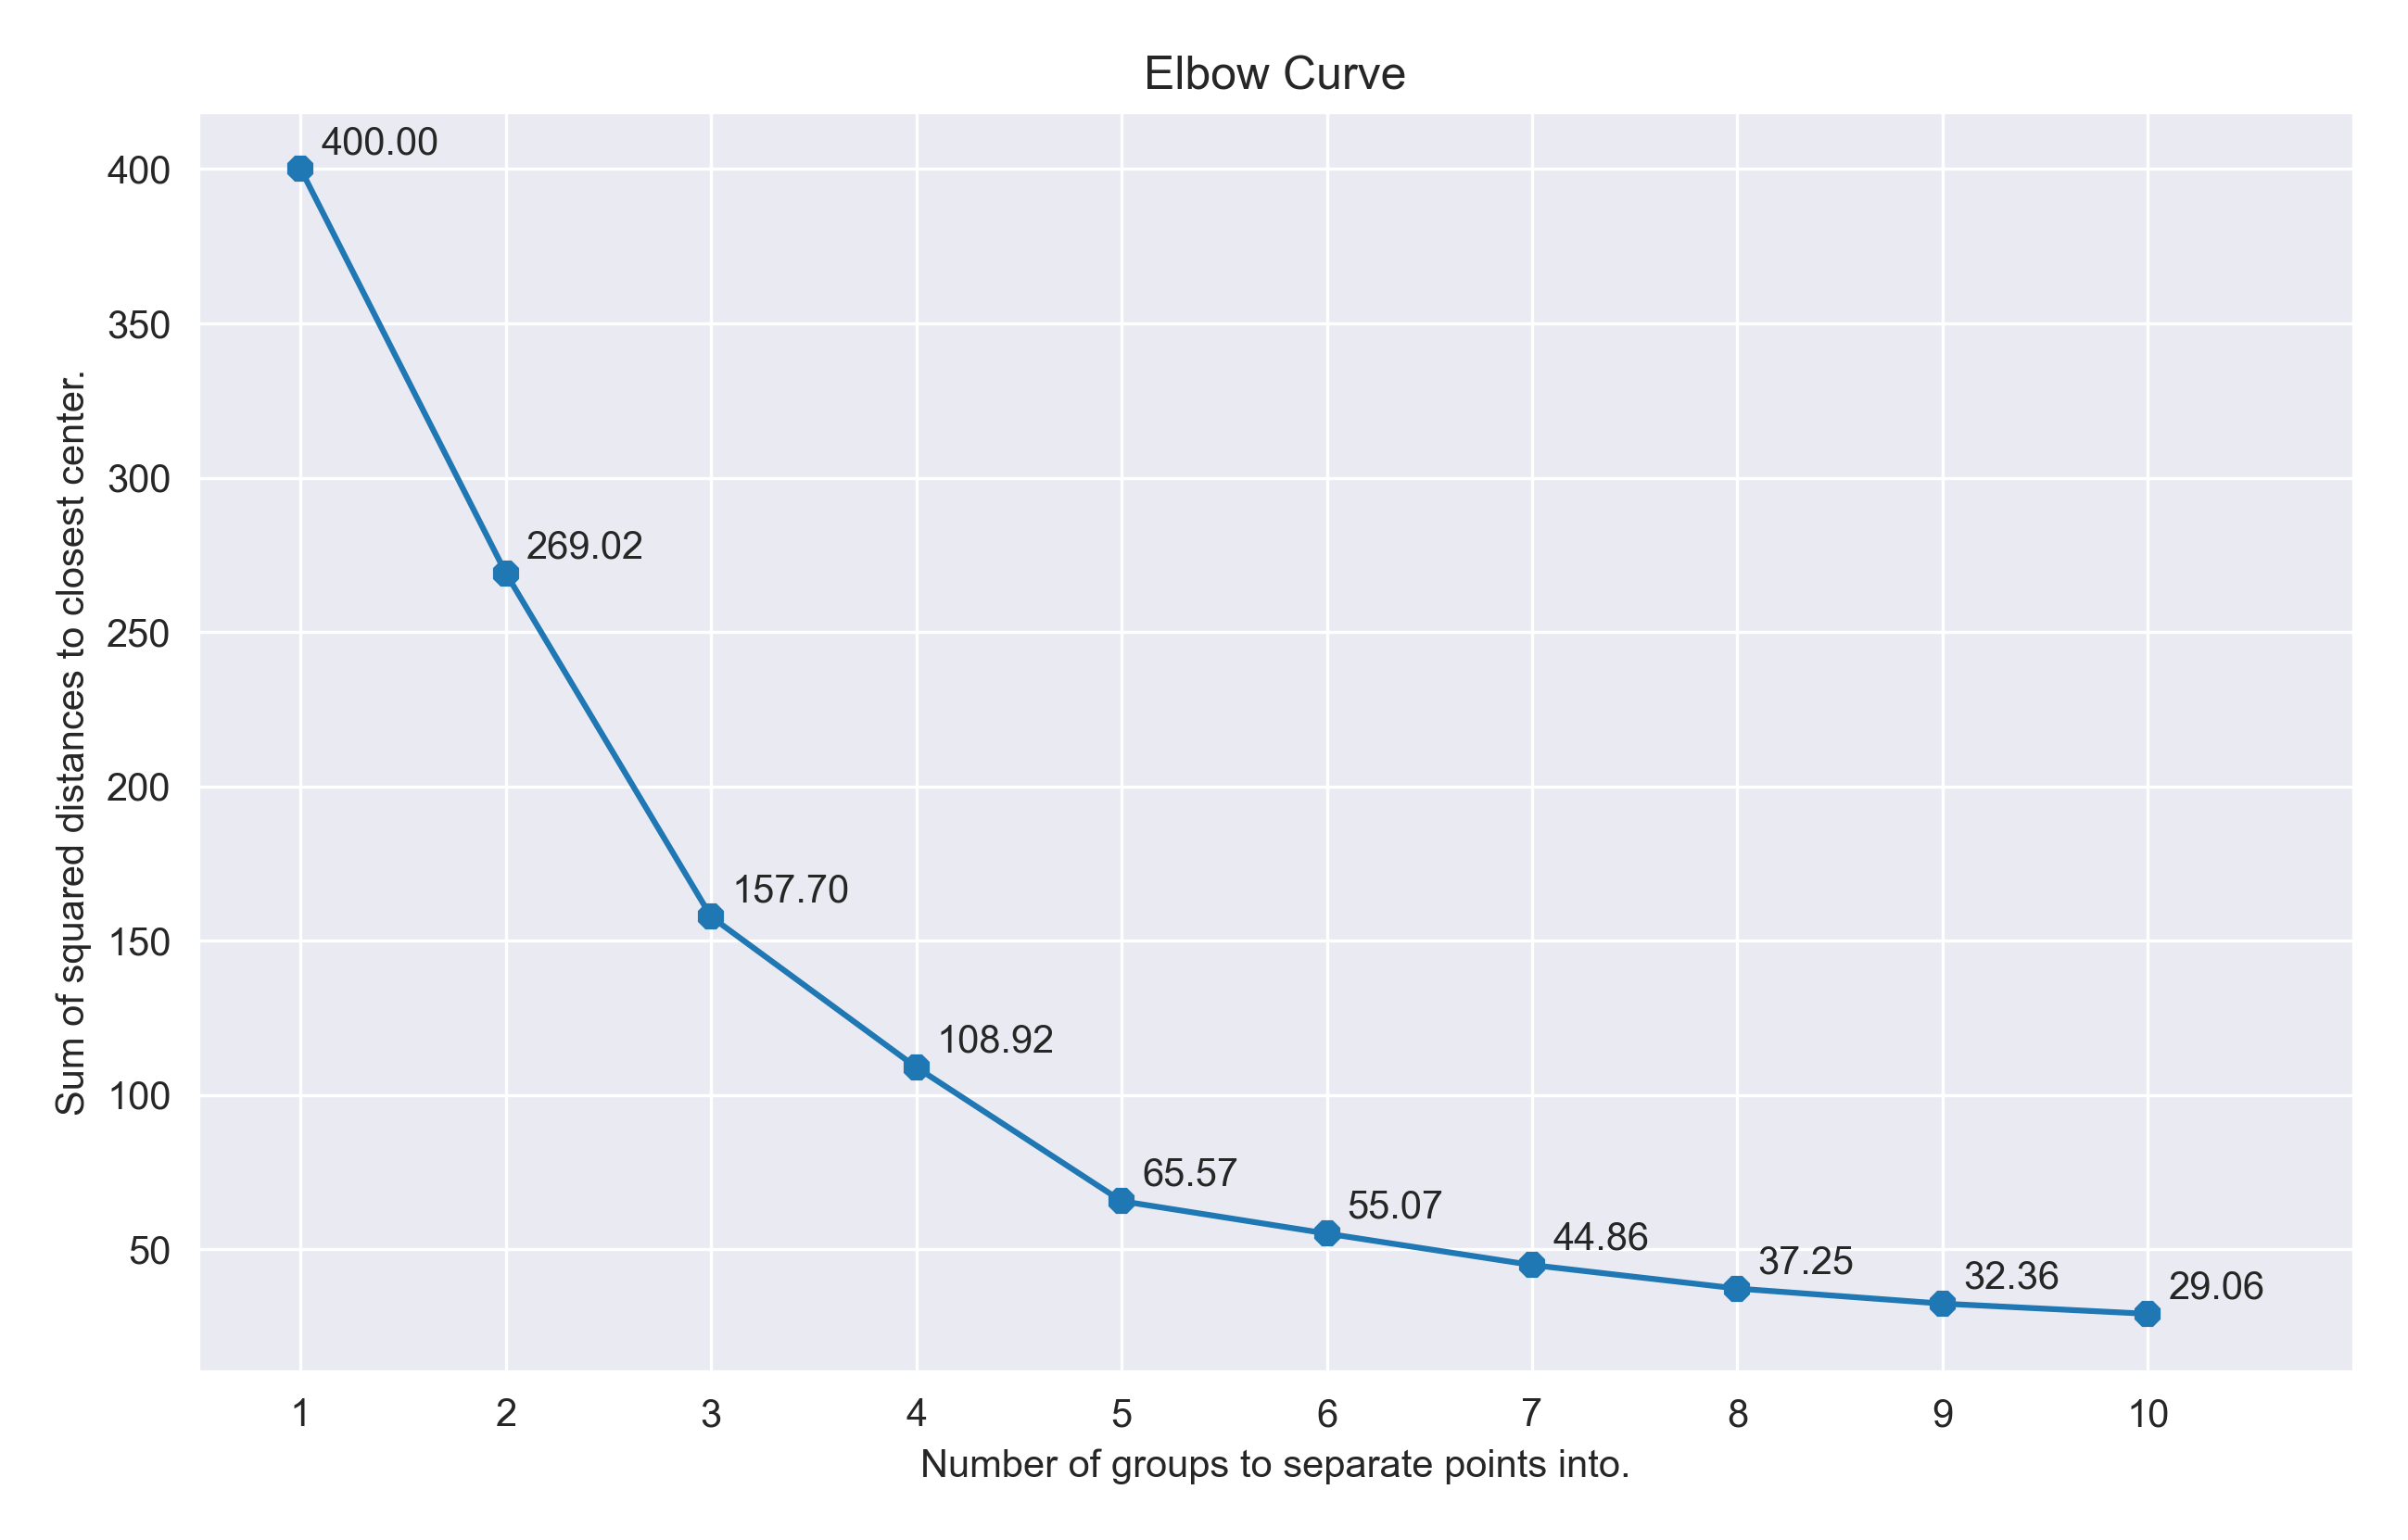

In [10]:
display(Image(filename='visualizations/elbow1.png', width=650, embed=True))

The closer points to the nearest center, the better (low $y$ values favoured). The smaller the number of groups, the better as well (low $x$ values are preferred). The line shows that after point $x=5$ the slope is only less steep, indicating that further division into groups provides less and less homogeneity (less profit). Thus, the optimal number of groups is 5.

### Results  <a id='3.2'><a/>

The result of grouping clients by `Spending Score` and `Annual Income` into five groups:

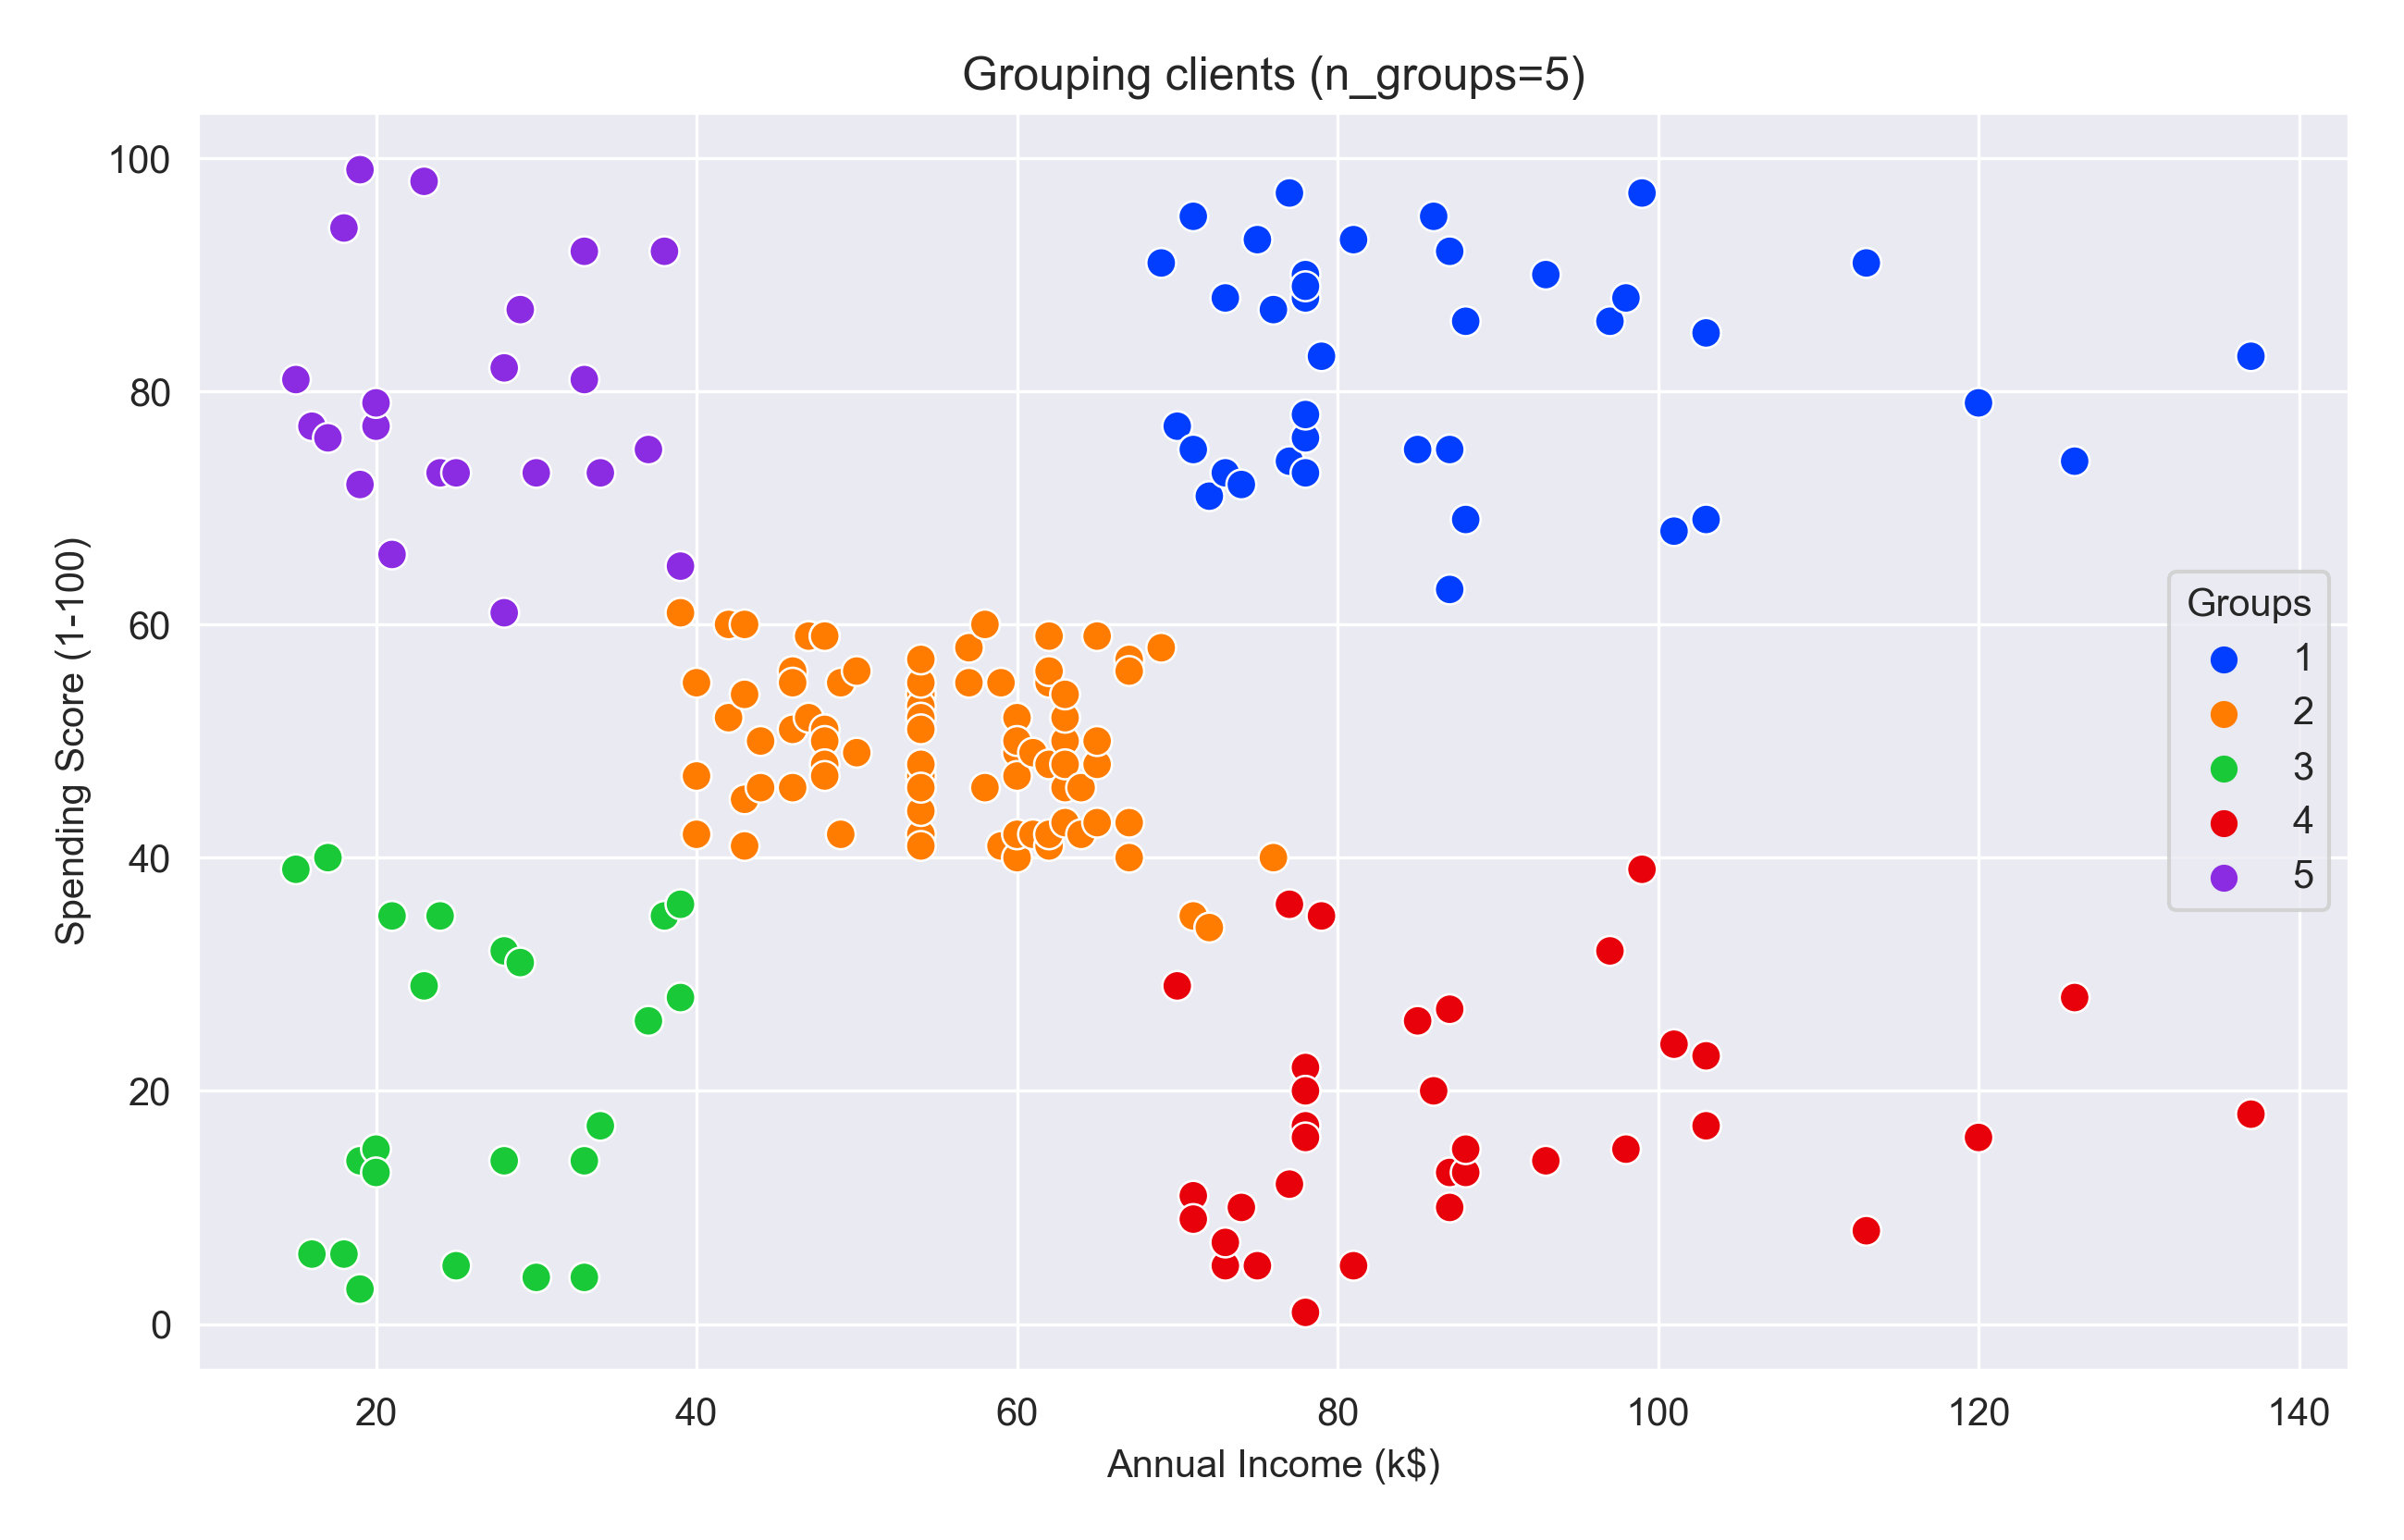

In [11]:
display(Image(filename='visualizations/clustering.png', width=700, embed=True))

The clusters on sides are not completely homogeneous while one in the middle (orange) is unique. It says that all customers of moderate annual salary ($\approx$40-60k/year) have the medium score of $\approx$40-60 points. Even though other four groups overlap with each other, overall segmentation is profitable.

For example, mall owner can take more care about people in orange group with salary close to 65k/year since after little increase in income, these people will fall into either blue or red group. Thus, since blue group is more beneficial for mall, its strategy will focus on clients who are on boundaries of high and low groups (like blue and red). Less attention will be given to low-scoring and high scoring clients, since they are far from boundaries.

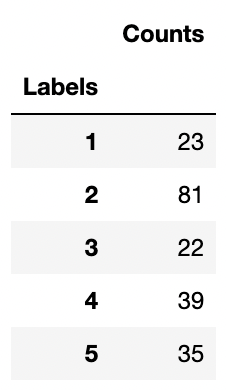

In [12]:
display(Image(filename='png/kmeans-labels.png', width=125, embed=True))

Moreover, second group (orange) is presented the most, and focusing on the development of that group has vivid idea while it covers $40.5\%$ of population (an estimate). Groups 1 and 3 (violet and green respectively) together comprise $22.5\%$ of clients, being the smallest segments.

**Conclusion**

To conclude, customers of mall are divided into 5 groups which are relatively different from each other. The group 2 (orange) can be uniquely targeted since it represents highly homogeneous subsample.

Considering analysis purpose, predict the `Spending Score` variable with high accuracy in the scope of given dataset is not possible. Relationships with other features made it possible to perform customers segmentation.